In [27]:
from dowhy import CausalModel
import dowhy.datasets
import matplotlib.pyplot as plt



In [28]:
data = dowhy.datasets.linear_dataset(
    beta=10,
    num_common_causes=5,
    num_instruments=2,
    num_samples=10000)

In [47]:
print(data.keys())
print("")
print("df head: ", data['df'].head().to_string())
print("len data: ", len(data['df']))
print("treatment name: ", data['treatment_name'])
print("outcome name: ", data['outcome_name'])
print("common causes: ", data['common_causes_names'])
print("instrument names: ", data['instrument_names'])
print("effect modifier names: ", data['effect_modifier_names'])
print("frontdoor variables names: ", data['frontdoor_variables_names'])
print("dot graph: ", data['dot_graph'])
print("gml graph: ", data['gml_graph'])
print("ate: ", data['ate'])

dict_keys(['df', 'treatment_name', 'outcome_name', 'common_causes_names', 'instrument_names', 'effect_modifier_names', 'frontdoor_variables_names', 'dot_graph', 'gml_graph', 'ate'])

df head:      Z0        Z1        W0        W1        W2        W3        W4     v0          y  propensity_score
0  1.0  0.045129  1.309055 -0.171825  0.098760  0.017591  1.336685   True  18.414237          0.998526
1  1.0  0.762882 -2.304766  2.328598  0.709514 -1.856505  2.204602   True  13.656093          0.972380
2  0.0  0.097076 -1.239226 -1.637484  0.649930 -1.351825  1.043974  False  -8.020593          0.546744
3  0.0  0.468491 -1.351227  0.052001 -1.066244 -0.224383  2.756972   True  12.646357          0.939630
4  1.0  0.782031 -0.549211 -0.638369 -1.297788 -0.372206  1.998097   True   8.027944          0.866096
len data:  10000
treatment name:  ['v0']
outcome name:  y
common causes:  ['W0', 'W1', 'W2', 'W3', 'W4']
instrument names:  ['Z0', 'Z1']
effect modifier names:  []
frontdoor variables names

In [30]:
df = data['df']
df.columns

Index(['Z0', 'Z1', 'W0', 'W1', 'W2', 'W3', 'W4', 'v0', 'y'], dtype='object')

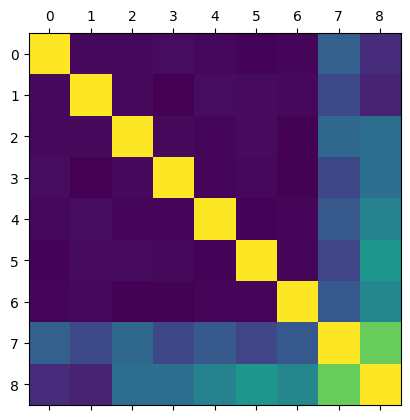

In [31]:
corr = df.corr()
plt.matshow(corr)

In [32]:
model = CausalModel(
    data=data["df"],
    treatment=data["treatment_name"],
    outcome=data["outcome_name"],
    graph=data["gml_graph"])

# Step 2: Identify causal effect and return target estimands
identified_estimand = model.identify_effect()

# Step 3: Estimate the target estimand using a statistical method.
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.propensity_score_matching")

# Step 4: Refute the obtained estimate using multiple robustness checks.
refute_results = model.refute_estimate(identified_estimand, estimate,
                                       method_name="random_common_cause")